#  PA005: High Values Customer Identification (Insiders)

# <font color='red' >  Ciclo 00 - Planejamento - Método IOT </font>

# <font color='red'> Ciclo 01 - Métricas de Validação de Clusters </font>

1. Featuring Engineering
    - Recência
    - Frequância
    - Monetização
    
    
    
2. Métricas de Validação de Clustering
    - WSS ( Whitin-Cluster Sum of Square)
    - SS ( Silhouette Score)
   
   
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

# <font color='red'> Ciclo 02 - Análise Silhouette </font>

1. Featuring Engineering
    - Average Ticket
    
    
2. Analysis Silhouette
    - Silhouette Analysis
    

3. Cluster Visualization 
    - UMAP
    
 
4. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

# <font color='red'> Ciclo 03 - Statistical Descriptive </font>

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos
    
    
2. Feature Engineering
    - Average Recency
    - Number of Returns
    

3. Data preparation
    - Standard Scaler

# 0.0. Planejamento da Solução ( IOT )

##  Input - Entrada

###  O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade "INSIDERS"
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

##  Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".
2. Relatório com as respostas para as seguintes perguntas:


- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

 1. Quem são as pessoas elegíveis para participar do programa de Insiders ?


- O que é ser elegível ? O que é um cliente "valioso" para a empresa ?

- Faturamento:
    
- Alto Ticket Médio
- Alto LTV
- Baixa Recência ou Alta Frequência ( tempo entre as compras )
- Alto Basket Size ( quantidade média de produtos comprados )
- Baixa probabilidade de Churn
- Previsão alta de LTV
- Alta propensão de compra

- Custo:
    
- Baixo número de devoluções
- Experiência:  
    
- Média alta de avaliações

2. Quantos clientes farão parte do grupo?


- Número de clientes
- % em relação ao total de clientes

3. Quais as principais características desses clientes ?


- Escrever os principais atributos dos clientes
- Idade
- País
- Salário
- Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
- Vide acima


4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?


- Calcular o faturamento total da empresa durante o ano.
- Calcular o faturamento (%) apenas do cluster Insiders.

5. Qual a expectativa de faturamento desse grupo para os próximos meses ?


- Cálculo do LTV do grupo Insiders
- Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )


6. Quais as condições para uma pessoa ser elegível ao Insiders ?


- Qual o período de avaliação ?
- O "desempenho" do cliente está próximo da média do cluster Insiders.

7. Quais as condições para uma pessoa ser removida do Insiders ?


- O "desempenho" do cliente não está mais próximo da média do cluster Insiders.

8. Qual a garantia que o programa Insiders é melhor que o restante da base ?


- Teste de Hipóteses
- Teste A/B

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?


- Descontos
- Preferências de escolha
- Produtos exclusivos

## 0.0 Imports

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import umap.umap_ as umap

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import mixture as mx
from plotly import express as px

from pandas_profiling import ProfileReport

from sklearn import ensemble as en
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition as dd
from sklearn import preprocessing as pp
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


##  0.2. Load dataset

In [3]:
# load data
df_raw = pd.read_csv( '../data/raw/Ecommerce.csv' ,encoding= 'unicode_escape' )

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df_raw.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39     17850.0  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39     17850.0  United Kingdom

## 1.0. Descrição dos Dados

In [6]:
df1 = df_raw.copy()

### 1.1 Rename columns

In [7]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [8]:
df1.sample()

invoice_no stock_code                   description  quantity invoice_date  unit_price  customer_id         country
494759     578272      22142  CHRISTMAS CRAFT WHITE FAIRY         12    21-Nov-17        1.45      17463.0  United Kingdom

### 1.2 Data dimensions

In [9]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of cols:{}'.format(df1.shape[1]))

Number of rows:541909
Number of cols:8


### 1.3 Data types

In [10]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4 Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5 Replace NA

In [12]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [14]:
#create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange( 19000, 19000+len(df_backup),1)
df_backup.head()

#merge original with reference dataframe
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
df1 = df1.drop(columns = ['customer_id_x', 'customer_id_y'], axis=1)


In [15]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

### 1.6 Change dtypes

In [16]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [17]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39  United Kingdom        17850

In [18]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7 Descriptive Statistics

In [19]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributtes

In [20]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concatenate
m = pd.concat([d2,d3,d4, ct1, ct2, d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range','mean','mediana','std' ,'skew', 'kurtosis']
m

attributes       min      max      range          mean   mediana          std        skew       kurtosis
0     quantity -80995.00  80995.0  161990.00      9.552250      3.00   218.080957   -0.264076  119769.160031
1   unit_price -11062.06  38970.0   50032.06      4.611114      2.08    96.759764  186.506972   59005.719097
2  customer_id  12346.00  22709.0   10363.00  16688.840453  16249.00  2911.408666    0.487449      -0.804287

### 1.7.1.1 Numerical Attributes - Investigating

1. Quantidade Negativa (pode ser devolução)
2. Preço Unitário igual a zero (pode ser promoção?)

### 1.7.2 Categorical Attributtes

In [21]:
#invoice number
# problema: Temos invoice com letras e numeros
#df1['invoice_no'].astype(int)

#identificação:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))), :]
df_letter_invoices.head()

print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0 ])))

#len(cat_attributes.loc[cat_attributes['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))), 'invoice_no'].drop_duplicates())

Total number of invoices: 9291
Total number of negative quantity: 9288


In [22]:
#stock code
#cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

# Ação:
# Remove stock_code ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']


array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [24]:
# Description
df1.head()

#Ação: Delete description


invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39  United Kingdom        17850

####    - Country

In [25]:
# Country

df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [26]:
df1['country'].value_counts( normalize=True).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [27]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

country  customer_id
36  United Kingdom         7587
14         Germany           95
13          France           90
10            EIRE           44
31           Spain           31

## 2.0 Filtragem de Variáveis

In [97]:
df2 = df1.copy()

In [98]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [99]:
# ===== Numerical Attributes=======
# unit price > 0.0
df2.loc[df2['unit_price'] >= 0.04, :]

# ===== Categorical attributes ======
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# description
df2 = df2.drop( columns='description', axis=1 )

# map 
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

#bad users
df2 = df2[~df2['customer_id'].isin([16446])]

# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]


##  <font color ='red'> 3.0 Feature Engineering</font>

In [140]:
# Feature Ideas:
## Moving Average - 7d, 14d, 30d
## Quantidade de Compras por mês, antes do dia 15 e depois do dia 15
## Average Financial
## Basket Size * Price - Quantidade de preços por cesta

In [100]:
df3 = df2.copy()

In [101]:
df3.head()

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E         6   2016-11-29        3.39  United Kingdom        17850

### 3.1 Feature Creation

In [102]:
# data reference
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

### 3.1.1 Gross revenue

In [103]:
# Gross revenue ( Faturamento ) quantity * price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

/home/vanessa/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/vanessa/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id         0
gross_revenue    1427
dtype: int64

### 3.1.2 Recency - Day from Last purchase

In [104]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id         0
gross_revenue    1427
recency_days     1427
dtype: int64

### 3.1.3 Quantity of purchase

In [105]:
# Numero de Produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby('customer_id').count()
                                                            .reset_index()
                                                            .rename(columns = {'invoice_no': 'qtde_invoices'}))
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id         0
gross_revenue    1427
recency_days     1427
qtde_invoices    1427
dtype: int64

### 3.1.4 Quantity of items purchase

In [106]:
# Numero de Produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename( columns={'quantity':'qtde_items'})

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id         0
gross_revenue    1427
recency_days     1427
qtde_invoices    1427
qtde_items       1427
dtype: int64

### 3.1.4 Quantity of products purchased

In [107]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id         0
gross_revenue    1427
recency_days     1427
qtde_invoices    1427
qtde_items       1427
qtde_products    1427
dtype: int64

### 3.1.5 Average Ticket Value

In [108]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id         0
gross_revenue    1427
recency_days     1427
qtde_invoices    1427
qtde_items       1427
qtde_products    1427
avg_ticket       1427
dtype: int64

### 3.1.6 Average Recency Days

In [109]:
#Average recency Days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending = ['False', 'False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() #next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() #next invoice date

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['previous_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1)

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()

#average recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()
#df_avg_recency_days.head()

#merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue       1427
recency_days        1427
qtde_invoices       1427
qtde_items          1427
qtde_products       1427
avg_ticket          1427
avg_recency_days    4919
dtype: int64

### 3.1.7 Frequency Purchase

In [110]:
df_aux = (df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                   .groupby('customer_id')
                                                   .agg(max_ = ('invoice_date', 'max'),
                                                      min_ = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: (( x.max() - x.min()).days )+ 1),
                                                      buy_ = ('invoice_no', 'count'))).reset_index()

#Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )
#df_aux.head(10)

#Merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')

df_ref.isna().sum()


customer_id            0
gross_revenue       1427
recency_days        1427
qtde_invoices       1427
qtde_items          1427
qtde_products       1427
avg_ticket          1427
avg_recency_days    4919
frequency           1427
dtype: int64

In [111]:
df_aux.sort_values('frequency', ascending=False).head()

customer_id       max_       min_  days_  buy_  frequency
4008        17850 2016-11-30 2016-11-29      2    34       17.0
2763        16120 2017-10-09 2017-10-09      1     4        4.0
2009        15098 2017-06-08 2017-06-08      1     3        3.0
2674        16000 2017-12-05 2017-12-05      1     3        3.0
3790        17545 2017-10-25 2017-10-25      1     3        3.0

### 3.1.8. Number of Returns

In [112]:
#Number of Returns
df_returns= df2_returns[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns = {'quantity':'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns']*-1

df_ref = pd.merge(df_ref, df_returns, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue       1427
recency_days        1427
qtde_invoices       1427
qtde_items          1427
qtde_products       1427
avg_ticket          1427
avg_recency_days    4919
frequency           1427
qtde_returns           0
dtype: int64

### 3.1.9 Basket Size - Quantidade de Items por Cesta ( Quantity )

- Invoice_no = Compra = Purchase
- Stock Code = Produto = Product
- Quantity = Item = Item

In [113]:
df_aux = (df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                         .agg(n_purchase=('invoice_no', 'nunique'),
                                                                             n_products=('quantity', 'sum'))
                                                                        .reset_index())

#calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id            0
gross_revenue       1427
recency_days        1427
qtde_invoices       1427
qtde_items          1427
qtde_products       1427
avg_ticket          1427
avg_recency_days    4919
frequency           1427
qtde_returns           0
avg_basket_size     1427
dtype: int64

### 3.2.0 Unique Basket Size - Quantidade de produtos distintos por compra

In [114]:
df_aux = (df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                             .agg(n_purchase=('invoice_no', 'nunique'),
                                                                                 n_products=('stock_code', 'nunique'))
                                                                            .reset_index())

#calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue             1427
recency_days              1427
qtde_invoices             1427
qtde_items                1427
qtde_products             1427
avg_ticket                1427
avg_recency_days          4919
frequency                 1427
qtde_returns                 0
avg_basket_size           1427
avg_unique_basket_size    1427
dtype: int64

In [115]:
df_ref.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333

In [79]:
#data reference
df_ref = df2.drop(['invoice_no', 'stock_code',  
                  'quantity', 'invoice_date', 'unit_price', 
                  'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref.head()

# Gross Revenue (Faturamento) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how= 'left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

#Avg Ticket 
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')


## 4.0 EDA (Exploraty Data Analysis)

In [116]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1 Univariate Analysis 

### 4.1.1 Gross Revenue 

 *** Notes
1. Clusters Coesos - Separados
2. Métricas
- Min, Máximo,Range ( Dispersão )
- Média e Mediana
- Desvio Padrão e Variância.
- Coeficiente de Variação ( CV )
- Distribuição

In [63]:
#rofile = ProfileReport( df4 )
#profile.to_file( 'output.html')

In [117]:
df4.sort_values('gross_revenue', ascending = False).head(10)

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
1148        14646      279138.02           1.0           73.0    197420.0         2064.0  135.241289          7.844444   0.206215         288.0      2704.383562                9.589041
560         18102      259657.30           0.0           60.0     64124.0          431.0  602.453132         14.680000   0.163043           0.0      1068.733333                2.500000
492         17450      194550.79           8.0           46.0     69993.0          337.0  577.302047         12.821429   0.127778         952.0      1521.586957                2.695652
67          14911      140450.72           1.0          199.0     80513.0         5675.0   24.749026          2.601399   0.533512        3332.0       404.587940                8.974874
1310        12415      124564.53          24.0           20.0     77669.0          715.0  174.216126         20.866667   0.063694         427.0      3883.450000               22.150000
203         14156      117379.63           9.0           55.0     57885.0         1400.0   83.842593          7.260000   0.151515         859.0      1052.454545               12.981818
15          17511       91062.38           2.0           31.0     64549.0          963.0   94.561142         11.593750   0.083333        1535.0      2082.225806               14.612903
12          16029       72882.09          38.0           62.0     40207.0          241.0  302.415311          9.054054   0.184524        8004.0       648.500000                0.693548
1085        16684       66653.56           4.0           28.0     50255.0          277.0  240.626570         22.125000   0.078873         864.0      1794.821429                4.250000
37          13694       65039.62           3.0           50.0     63312.0          568.0  114.506373          9.736842   0.134771        1504.0      1266.240000                7.320000

In [118]:
df3[df3['customer_id'] == 14646].head()

invoice_no stock_code  quantity invoice_date  unit_price      country  customer_id
37952     539491      21981        12   2016-12-18        0.29  Netherlands        14646
37953     539491      21986        12   2016-12-18        0.29  Netherlands        14646
37954     539491      22720         2   2016-12-18        4.95  Netherlands        14646
37955     539491      21931         1   2016-12-18        1.95  Netherlands        14646
37956     539491      22613         2   2016-12-18        0.85  Netherlands        14646

### 4.1.2 Qtde Items

In [119]:
df4[df4['qtde_items'] == 197420]

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
1148        14646      279138.02           1.0           73.0    197420.0         2064.0  135.241289          7.844444   0.206215         288.0      2704.383562                9.589041

In [120]:
#df4[df4['qtde_products_x'] == 7838]
df4[df4['customer_id'] == 17841]

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
69        17841       40967.72           1.0          124.0     23053.0         7838.0    5.226808          3.321429    0.33244         203.0        185.91129                10.66129

### 4.1.3 Avg Ticket 

In [75]:
#df4[df4['avg_ticket'] == 5.226808]

Empty DataFrame
Columns: [customer_id, gross_revenue, recency_days, qtde_invoices, qtde_items, qtde_products_x, avg_ticket, avg_recency_days, frequency, qtde_returns, qtde_products_y, avg_basket_size, avg_unique_basket_size]
Index: []

In [121]:
df3[df3['customer_id']== 14646].head()

invoice_no stock_code  quantity invoice_date  unit_price      country  customer_id
37952     539491      21981        12   2016-12-18        0.29  Netherlands        14646
37953     539491      21986        12   2016-12-18        0.29  Netherlands        14646
37954     539491      22720         2   2016-12-18        4.95  Netherlands        14646
37955     539491      21931         1   2016-12-18        1.95  Netherlands        14646
37956     539491      22613         2   2016-12-18        0.85  Netherlands        14646

### 4.1.4 Frequency

In [122]:
df4[df4['frequency'] == 17]

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222              35.5       17.0          40.0        50.970588                0.617647

In [123]:
df3[df3['customer_id']== 17850].sort_values('quantity', ascending=True).head(10)

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
86895    C543611     82494L       -12   2017-02-08        2.55  United Kingdom        17850
86896    C543611      21071        -6   2017-02-08        1.06  United Kingdom        17850
86889    C543611      22632        -6   2017-02-08        1.85  United Kingdom        17850
86902    C543611      21169        -2   2017-02-08        1.45  United Kingdom        17850
86900    C543611      71477        -2   2017-02-08        2.75  United Kingdom        17850
86897    C543611      82483        -2   2017-02-08        4.95  United Kingdom        17850
86892    C543611     82494L        -2   2017-02-08        2.55  United Kingdom        17850
86901    C543611      82483        -1   2017-02-08        4.95  United Kingdom        17850
86888    C543611      82483        -1   2017-02-08        4.95  United Kingdom        17850
86891    C543611      21871        -1   2017-02-08        1.06  United Kingdom        17850

### 4.1.5 Average Basket Size

In [124]:
df4[df4['avg_basket_size'] == 40498.5]

Empty DataFrame
Columns: [customer_id, gross_revenue, recency_days, qtde_invoices, qtde_items, qtde_products, avg_ticket, avg_recency_days, frequency, qtde_returns, avg_basket_size, avg_unique_basket_size]
Index: []

## 4.2 Bivariate Analysis

In [125]:
cols = ['customer_id']
df42 = df4.drop( cols, axis=1)

<Figure size 1800x864 with 0 Axes>

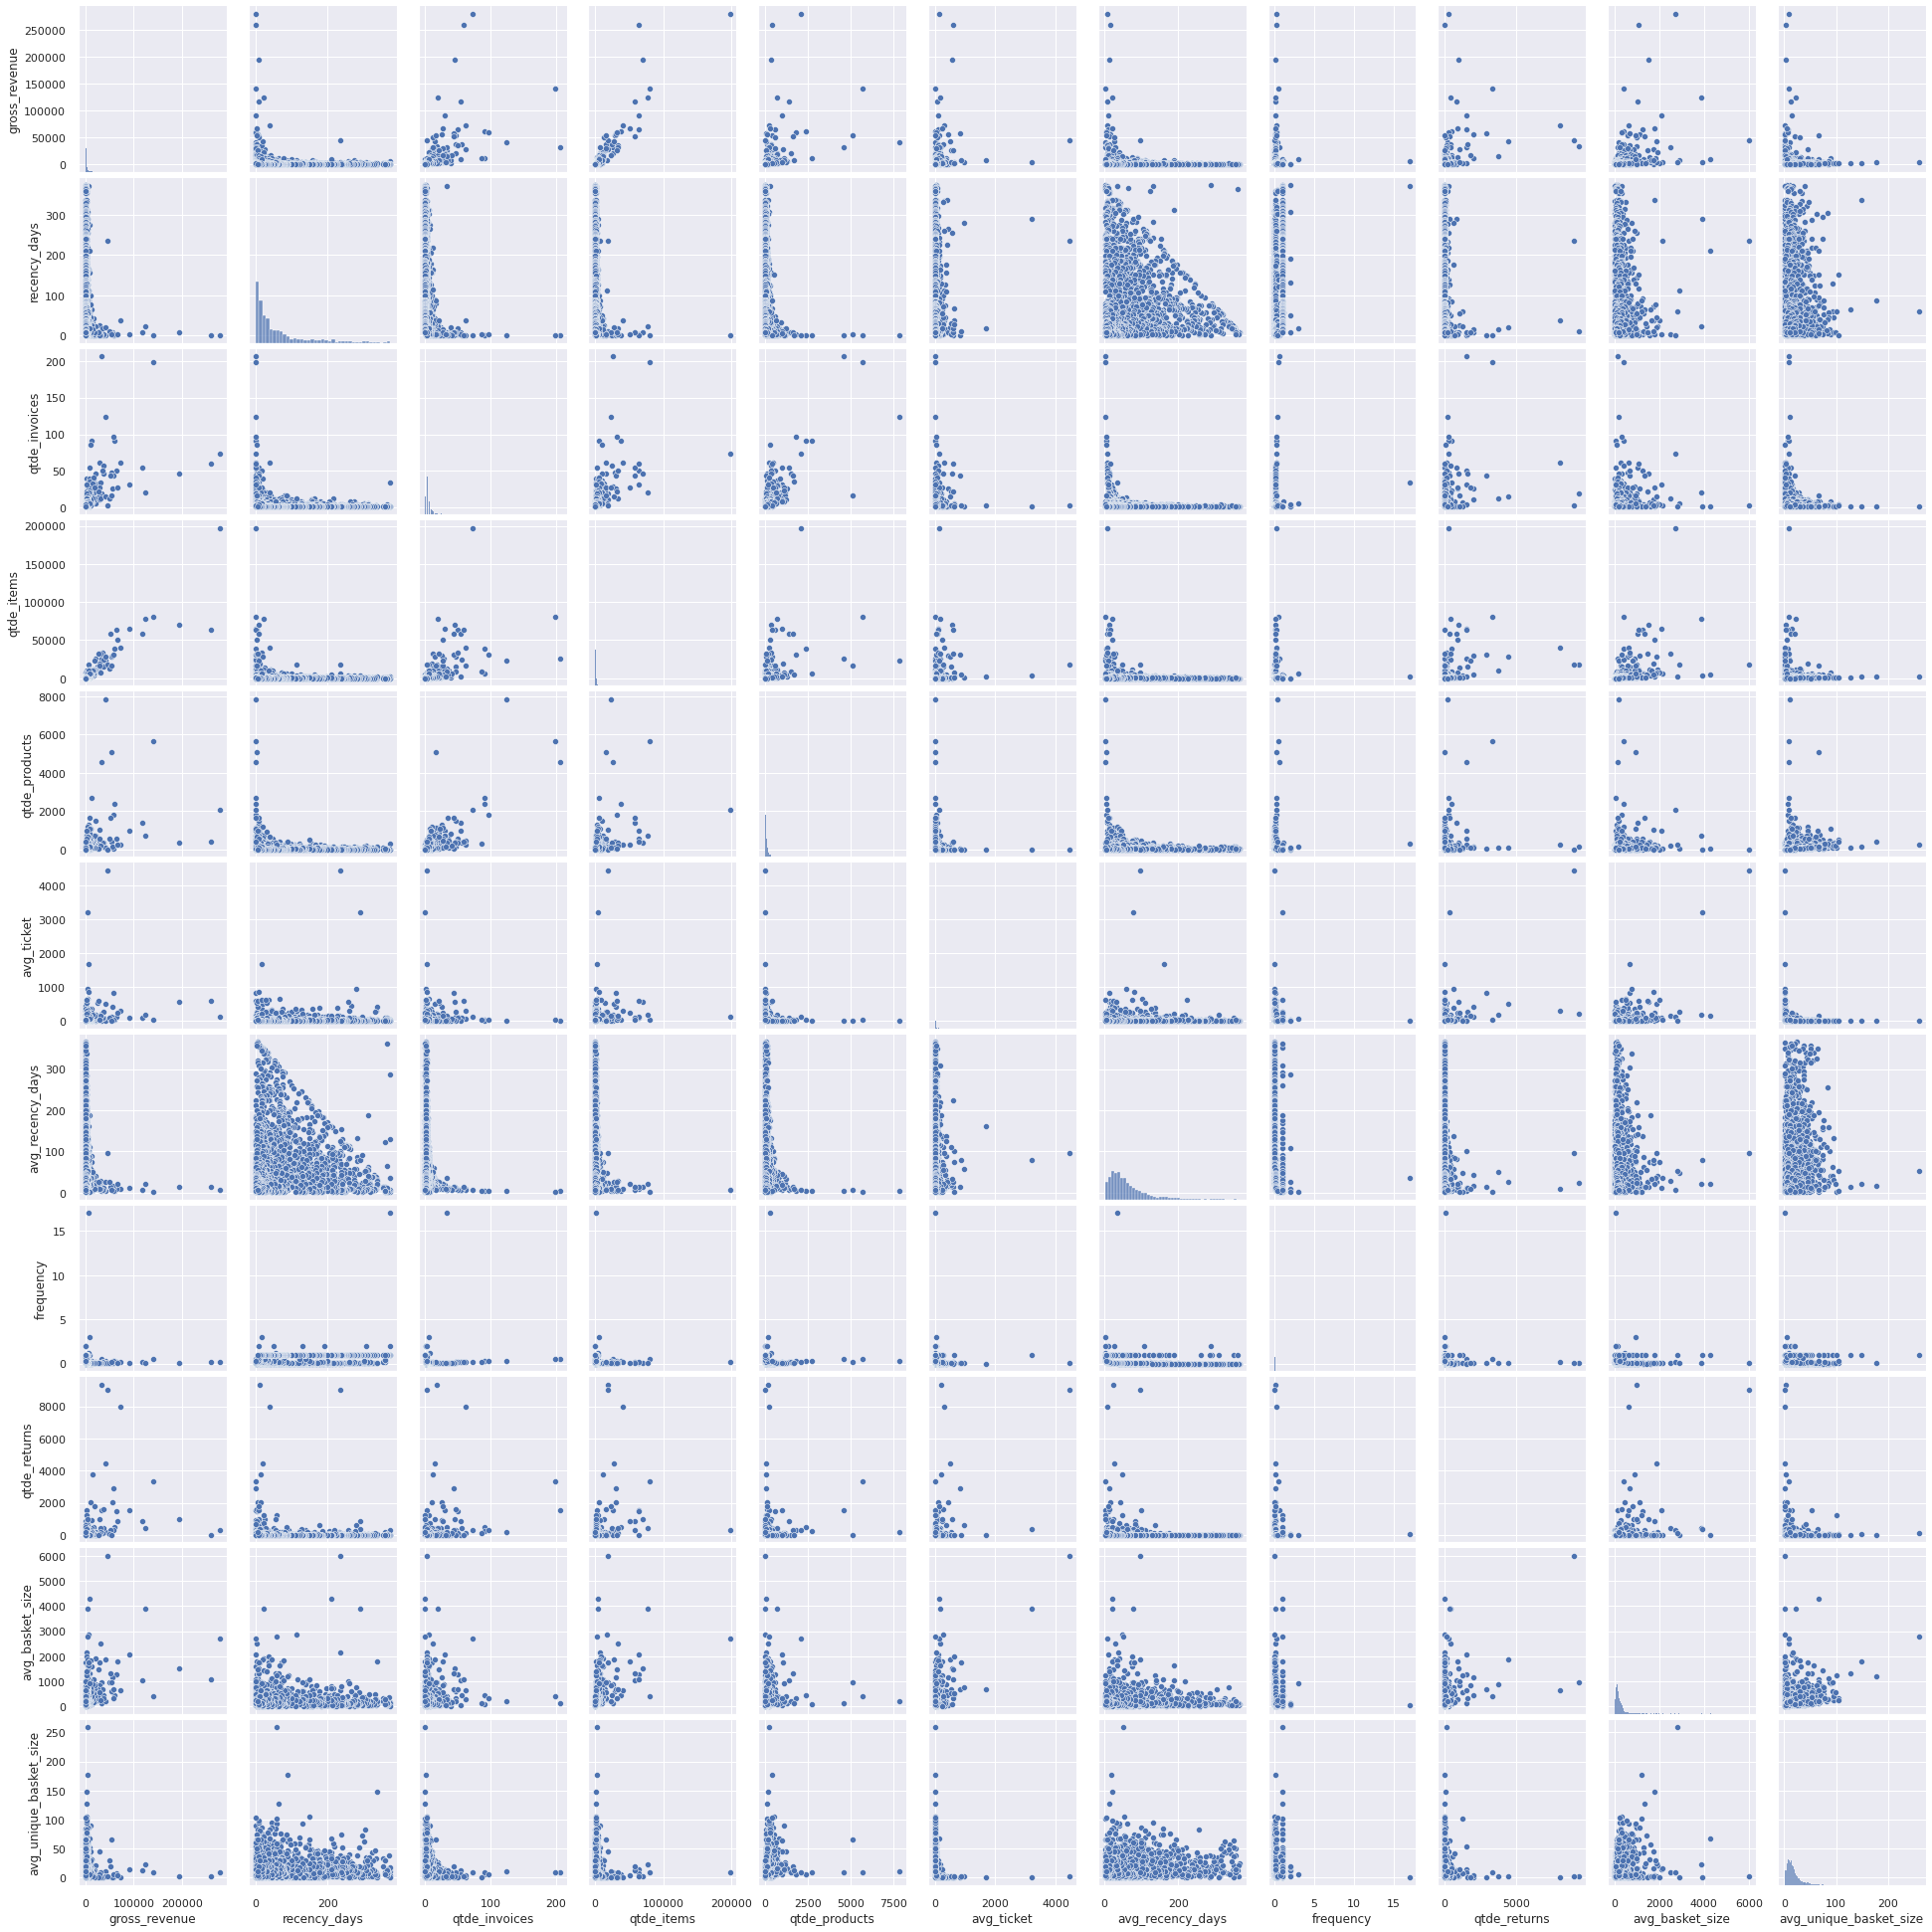

In [126]:
plt.figure(figsize=(25,12))
sns.pairplot(df42)

**Notes**

1. Frequency has low variance
2. Avg Ticket has low variance

## 4.3 Estudo do Espaço

In [127]:
df43 = df4.drop(['customer_id'],axis =1).copy()

In [129]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days'] = mm.fit_transform(df43[['recency_days']])
df43['qtde_invoices'] = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_items'] = mm.fit_transform(df43[['qtde_items']])
df43['qtde_products'] = mm.fit_transform(df43[['qtde_products']])
df43['avg_ticket'] = mm.fit_transform(df43[['avg_ticket']])
df43['avg_recency_days'] = mm.fit_transform(df43[['avg_recency_days']])
df43['frequency'] = mm.fit_transform(df43[['frequency']])
df43['qtde_returns'] = mm.fit_transform(df43[['qtde_returns']])
df43['avg_basket_size'] = mm.fit_transform(df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

### 4.3.1 PCA

In [130]:
X.shape[1]

11

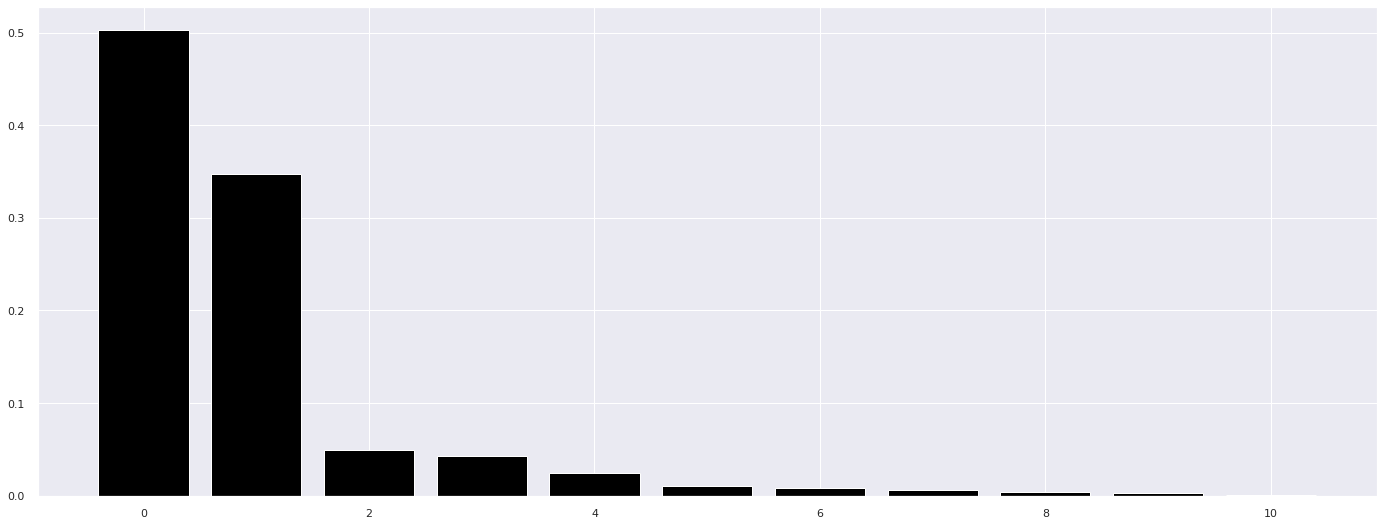

In [131]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range(pca.n_components_)

plt.bar( features, pca.explained_variance_ratio_, color='black')

#pca component
df_pca =  pd.DataFrame( principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

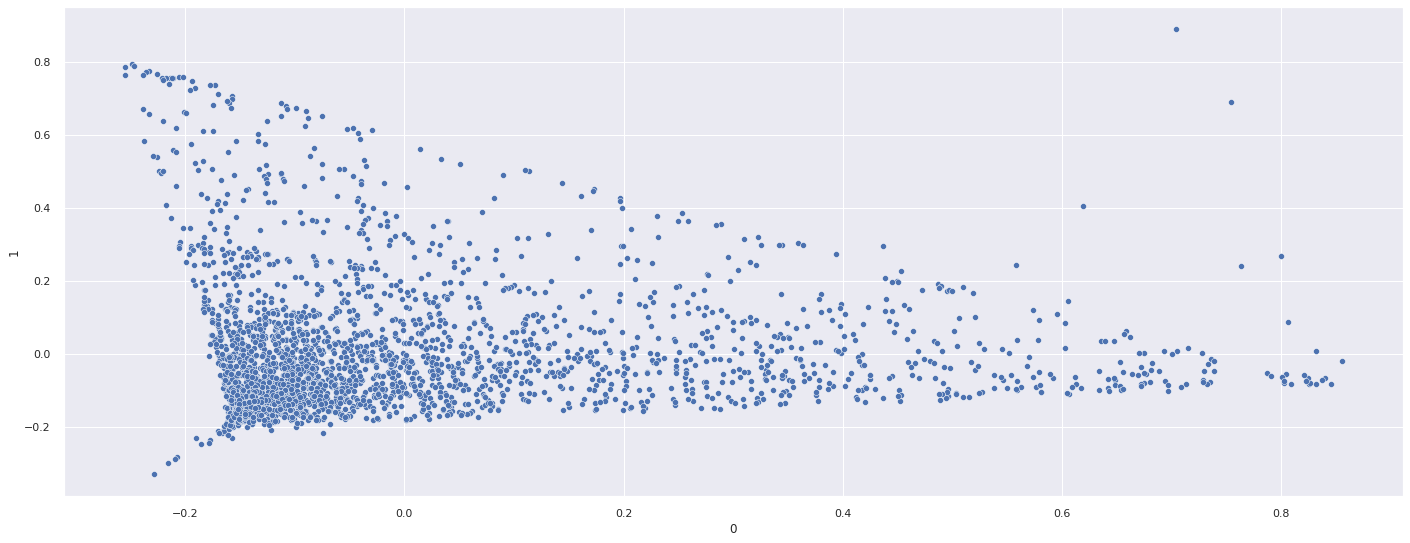

In [132]:
sns.scatterplot(x=0, y=1, data=df_pca)

In [133]:
df_pca.head()

0         1         2         3         4         5         6         7         8         9         10
0  0.855568 -0.020551  0.054710  0.125868 -0.123123  0.032331 -0.090606  0.961304  0.013453  0.014723 -0.000126
1 -0.009912 -0.112823 -0.018286  0.015941 -0.009550  0.002836 -0.000981 -0.005969 -0.000041 -0.001783  0.001848
2 -0.154081 -0.144849  0.005209  0.042694  0.000368 -0.008224 -0.013301 -0.000321 -0.008852 -0.010706 -0.002012
3  0.074397  0.077992 -0.039216  0.041238  0.000077 -0.001147  0.000388 -0.005866  0.000219 -0.002011  0.000123
4  0.735061 -0.076984 -0.030017  0.061177  0.004961  0.010884 -0.007462 -0.029923  0.047422 -0.000721 -0.007251

### 4.3.2 UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

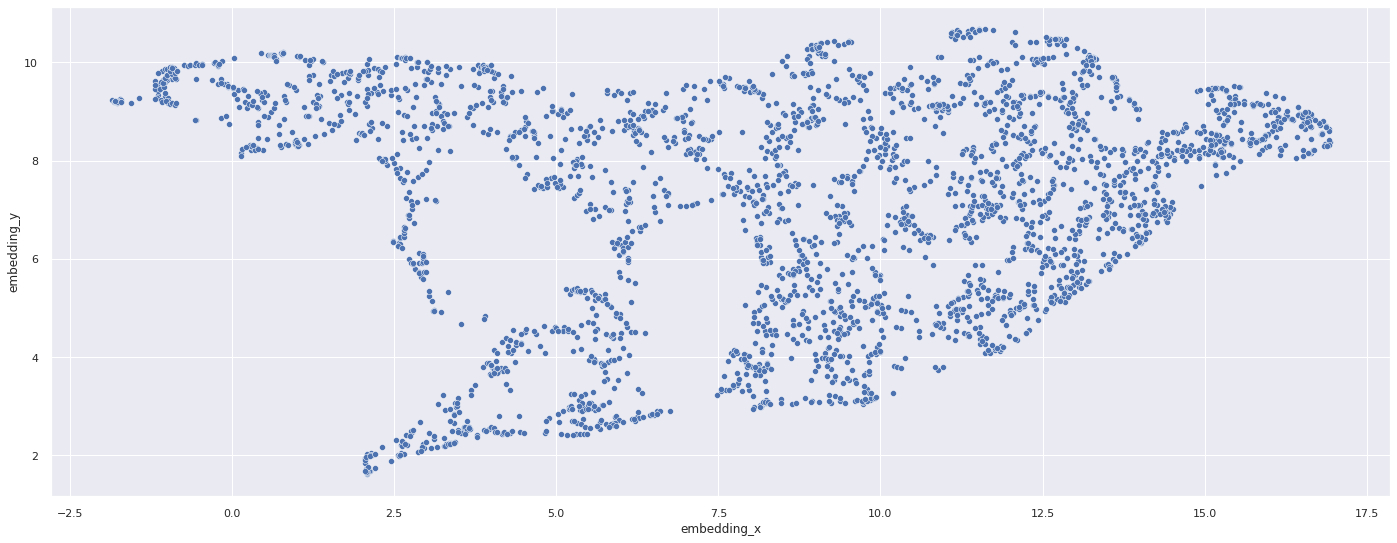

In [134]:
reducer = umap.UMAP( random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data=df_pca)

### 4.3.3 t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

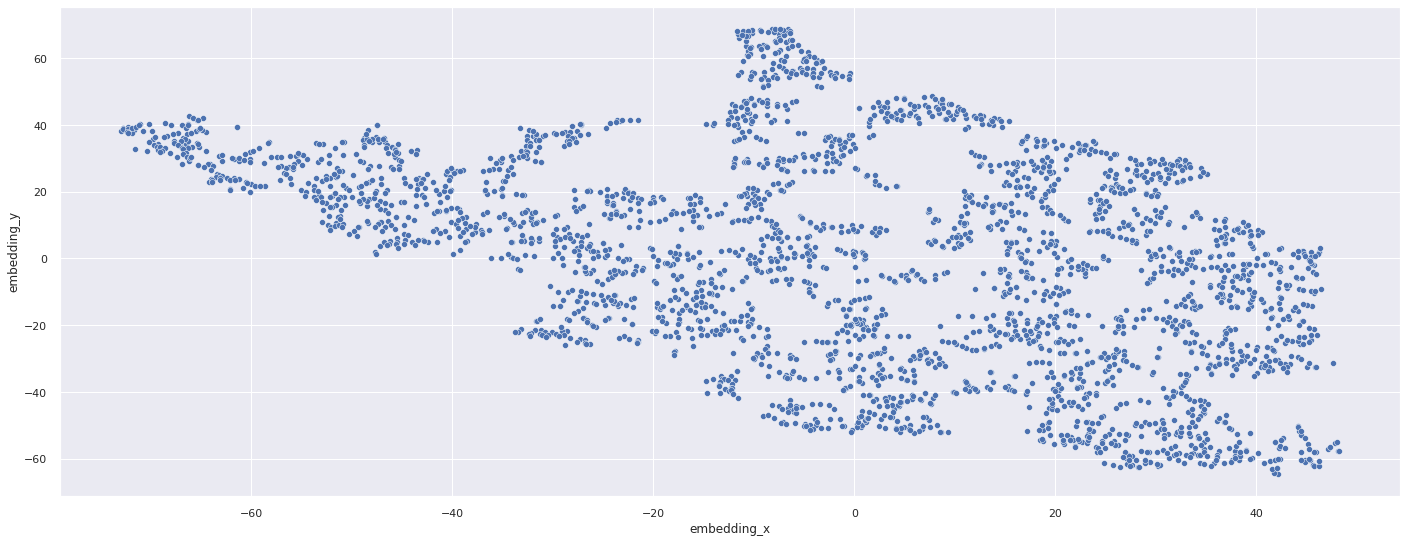

In [135]:
reducer = TSNE( random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data=df_pca)

### 4.3.4 Tree-Based Embedding

In [137]:
# training dataset
X = df4.drop(columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42 )

# model training
rf_model.fit(X, y)

# Leaf

# dataframe Leaf

RandomForestRegressor(random_state=42)

In [138]:
df_leaf = pd.DataFrame(rf_model.apply(X))

In [139]:
df_leaf.head()

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0  3192  3001  3346  3335  3034  3007  3045  3344  3162  3347  3147  3115  2470  3278  3081  3268  3018  3151  3111  3258  2925  2915  2900  3292  3201  3364  3131  2827  3082  3290  3095  3374  3134  3343  3328  3256  3350  3149  3096  3217  3192  3214  3386  3171  3077  3117  3202  2886  3410  3128  3191  2336  3454  3011  3317  3339  3310  3373  3216  3135  3427  2893  3163  2950  3162  2968  3304  2980  3129  3168  3292  3008  2747  3195  3152  3355  3381  3117  3210  3165  3119  3332  3263  3345  3297  3151  3344  3209  3127  3302  2935  3238  3216  3090  3124  3076  3039  2826  3134  2871
1  2917  2806  3041  3009  3020  2984  3045  2940  3091  2861  3088  3087  3045  2990  3024  2694  3011  2931  2906  2824  2878  2889  2791  2904  3130  2989  3056  2810  3029  3009  2897  3235  3077  2491  2942  2960  2998  2773  2850  2892  3138  2784  3148  3112  3045  3044  2922  2836  2981  3100  3111  3055  2702  2959  2945  2966  2951  3015  2787  3091  2989  2879  2831  2878  3142  2929  2748  2912  3050  2830  2980  2965  3060  2938  3028  2925  2932  3060  3142  2504  3086  2776  2963  2586  2903  3128  2946  3124  3108  2906  2834  2560  2941  3060  3098  2376  2919  2801  3073  2833
2  3660  3599  3557  3593  3486  3604  3560  3538  3679  3636  3668  3572  3463  3645  3541  3584  3587  3629  3567  3478  3519  3596  3588  3554  3508  3669  3497  3591  3585  3718  3436  3654  3611  3645  3456  3622  3546  3473  3610  3555  3530  3614  3583  3472  3580  3590  3519  3665  3669  3540  3657  3636  3590  3606  3676  3588  3616  3700  3578  3565  3632  3407  3583  3702  3607  3600  3622  3565  3609  3621  3513  3429  3567  3548  3602  3551  3613  3544  3651  3501  3509  3543  3549  3589  3557  3564  3588  3702  3524  3568  3545  3493  3559  3526  3558  3477  3557  3608  3582  3640
3  1280  1420  1880  1661  2104  2064  2087  1808  1649  1792  2193  2299  1376  1585  2019  1926  1929  1572  1580  1858  1533  1404  1468  1540  1135  1915  1646  1806  1985  1467  1857  1531  1498  1254  1554  1557  2105  2203  1301  1845  1531  1798  1464  1816  1524  1621  1439  1446  1363  1698  1916  1516  1795  1567  2090  1503  2071  1655  1338  1824  1511  2059  1853  1864  2019  1472  1408  2033  1505  1237  2302  1536  1241  2167  1326  1127  1510  1468  2155  1397  1455  1248  1243  1692  1501  1508  1407  1822  1559  1324  1525  1375  2039  1815  1382  2086  1503  1191  1450  2099
4   354   718   558   685   141   712   708   676   197   183   568   713   672   192   154   600   590   418   549   577   185   218    11   160   626   207   559   537   147   724   708   199   450   197   238   717   599   206   239   603   520   514   215   582   908   575   288   583   690   598   592   189   643   557   549   548   204   712   728   617   203   735   195   204   669   444   477   564   451   205   705   225   534   623   715   329   717   157   111   181   216   571   737   226   690   168   314   624   686   863   333   191   591   552   203   168   220   702   628   184

In [141]:
df_leaf.shape

(2968, 100)

In [140]:
X.shape

(2968, 10)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

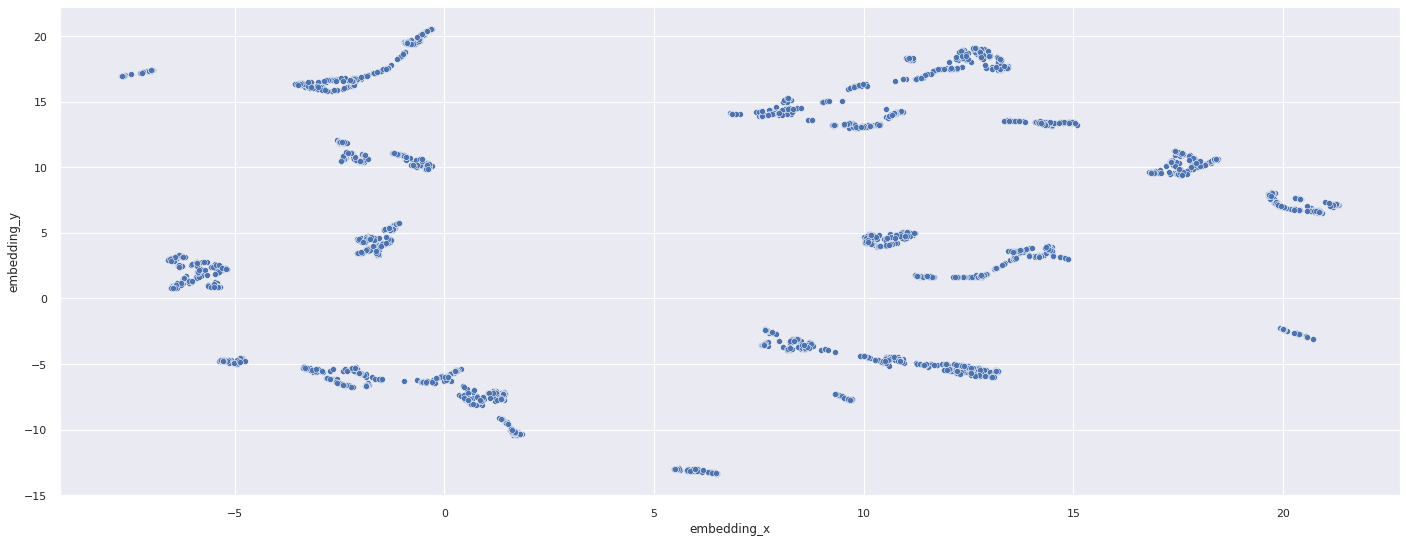

In [142]:
# reducer dimensionality
reducer = umap.UMAP( random_state=42)
embedding = reducer.fit_transform(df_leaf)

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
               y='embedding_y',
               data=df_pca)

## 5.0 Data Preparation

In [159]:
df5 = df4.copy()

In [160]:
df5.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333

/home/vanessa/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross_revenue', ylabel='Density'>

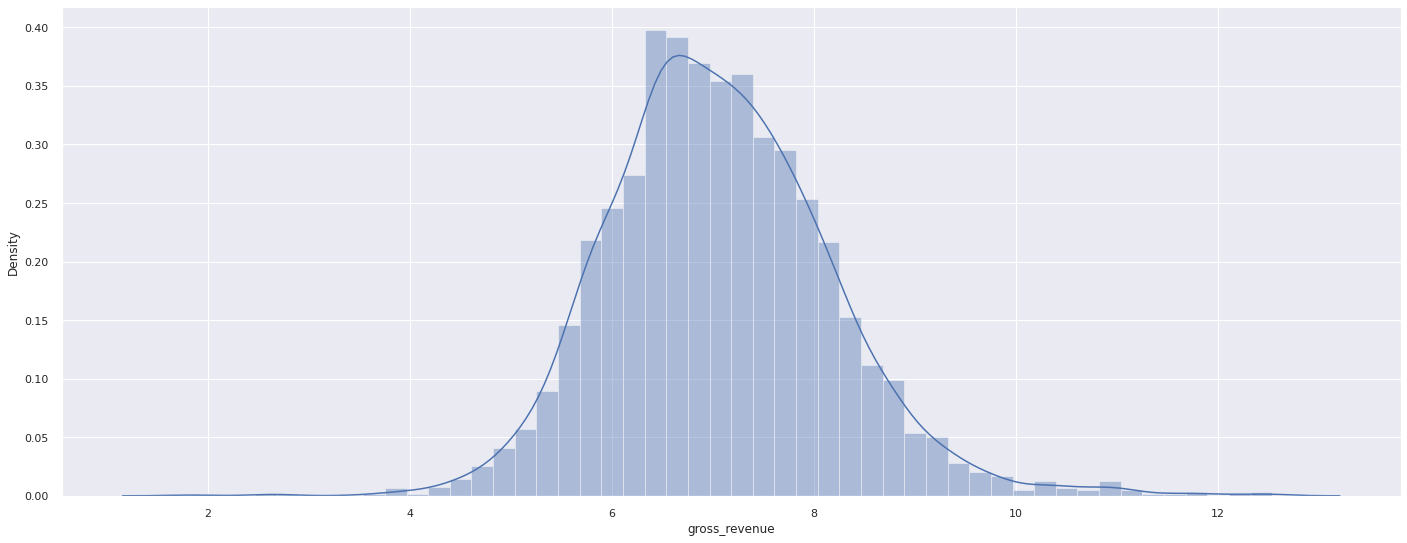

In [161]:
sns.distplot(np.log(df5['gross_revenue']))

In [146]:
df5.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [147]:
# Standard Scaler
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
df5['qtde_invoices'] = ss.fit_transform(df5[['qtde_invoices']])
df5['qtde_items'] = ss.fit_transform(df5[['qtde_items']])
df5['qtde_products'] = ss.fit_transform(df5[['qtde_products']])
df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])
df5['avg_recency_days'] = ss.fit_transform(df5[['avg_recency_days']])
df5['frequency'] = ss.fit_transform(df5[['frequency']])
df5['qtde_returns'] = ss.fit_transform(df5[['qtde_returns']])
df5['avg_basket_size'] = ss.fit_transform(df5[['avg_basket_size']])
df5['avg_unique_basket_size'] = ss.fit_transform(df5[['avg_unique_basket_size']])

## 6.0 Feature Selection

In [178]:
df6 = df5.copy()

## 7.0 Hiperparameter Fine-Tunning

In [179]:
X = df6.drop( columns = ['customer_id'])

In [180]:
X.head()

gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333

In [181]:
clusters = [2,3,4,5,6,7]

In [167]:
for k in clusters:
    print(k)

2
3
4
5
6
7


### 7.1 K-Means

In [182]:
kmeans_list = []
for k in clusters:
    #model definition
    kmeans_model = c.KMeans( n_clusters=k)
    
    #model training
    kmeans_model.fit( X )
    
    #model predict
    labels = kmeans_model.predict( X )
    
    #model performance
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    kmeans_list.append( sil )

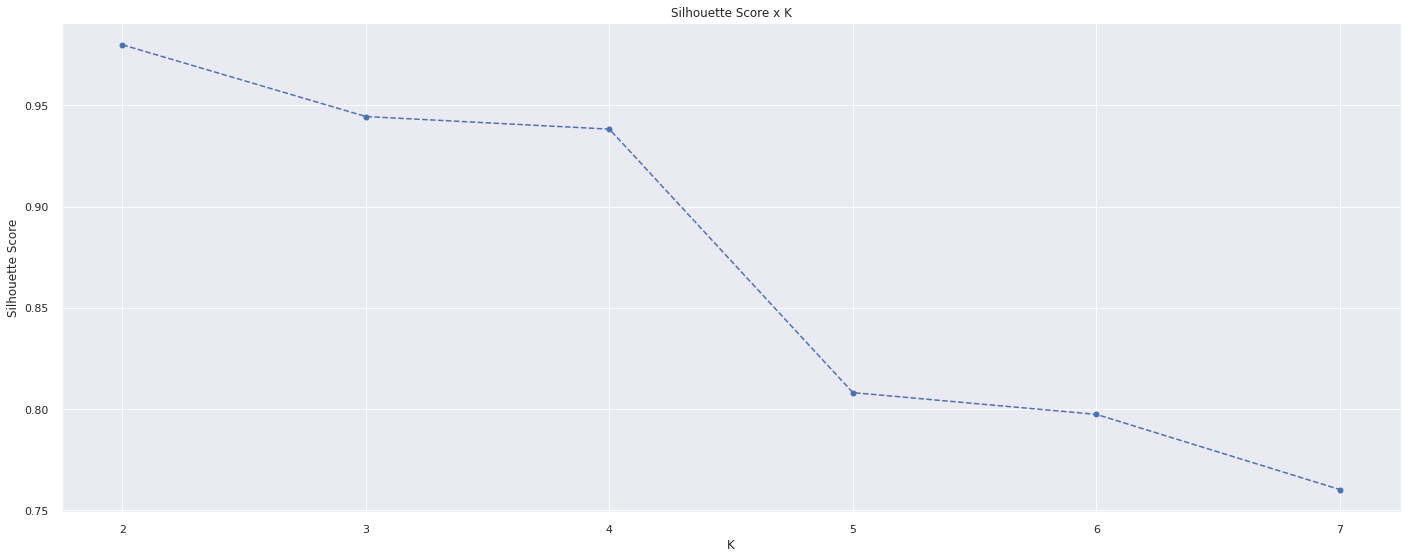

In [183]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );

### 7.2 GMM

In [184]:
gmm_list=[]
for k in clusters:
    #model definition
    gmm_model = mx.GaussianMixture( n_components=k )
     
    #model training
    gmm_model.fit( X )
    
    #model predict
    labels = gmm_model.predict( X )
    
    #model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append( sil )

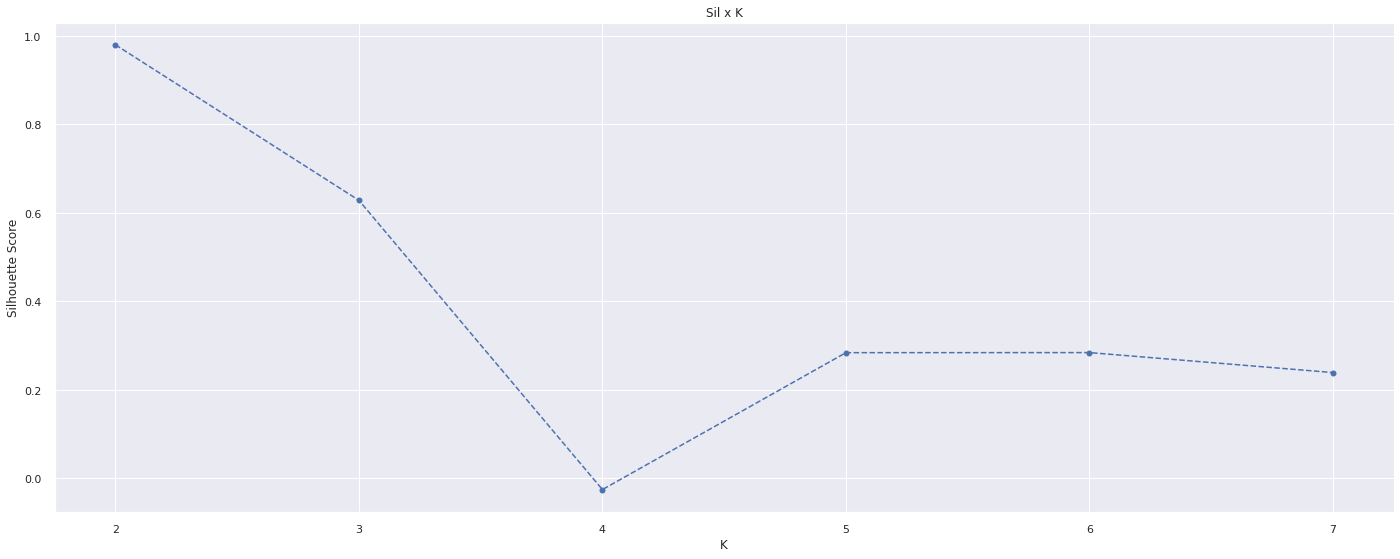

In [185]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Sil x K');

### 7.3 Hierarchical Clustering

In [201]:
from scipy.cluster import hierarchy as hc

In [202]:
hc_model = hc.linkage(X, 'ward')

[]

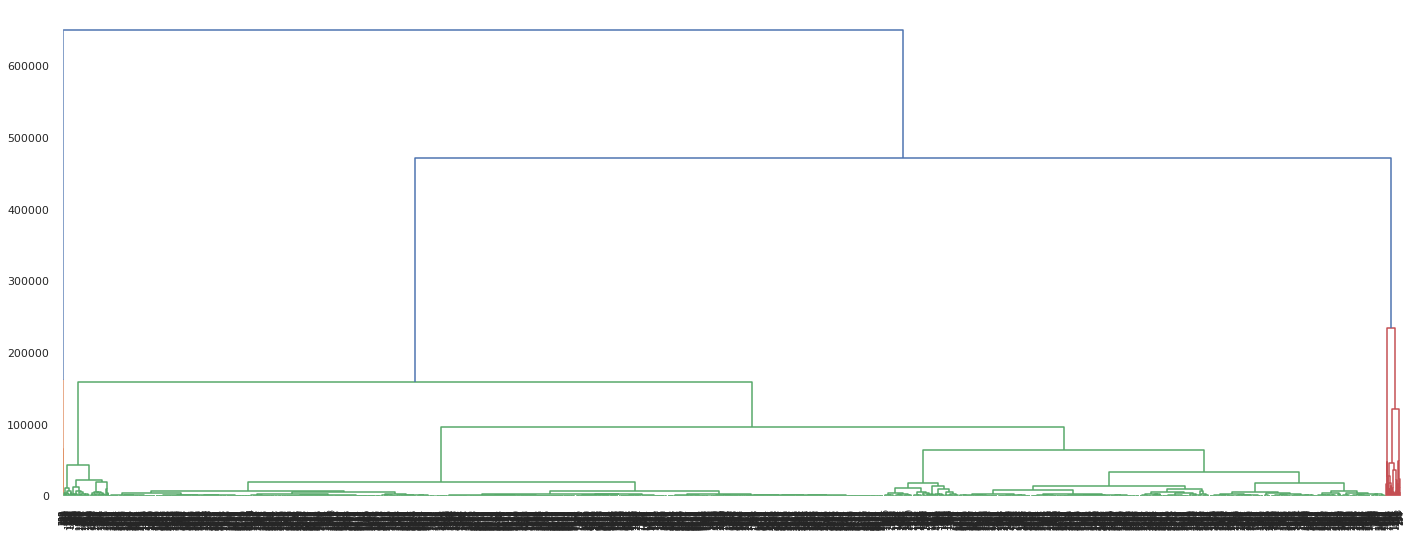

In [198]:
hc.dendrogram(
    hc_model,
    leaf_rotation=90,
    leaf_font_size=8
)

plt.plot()

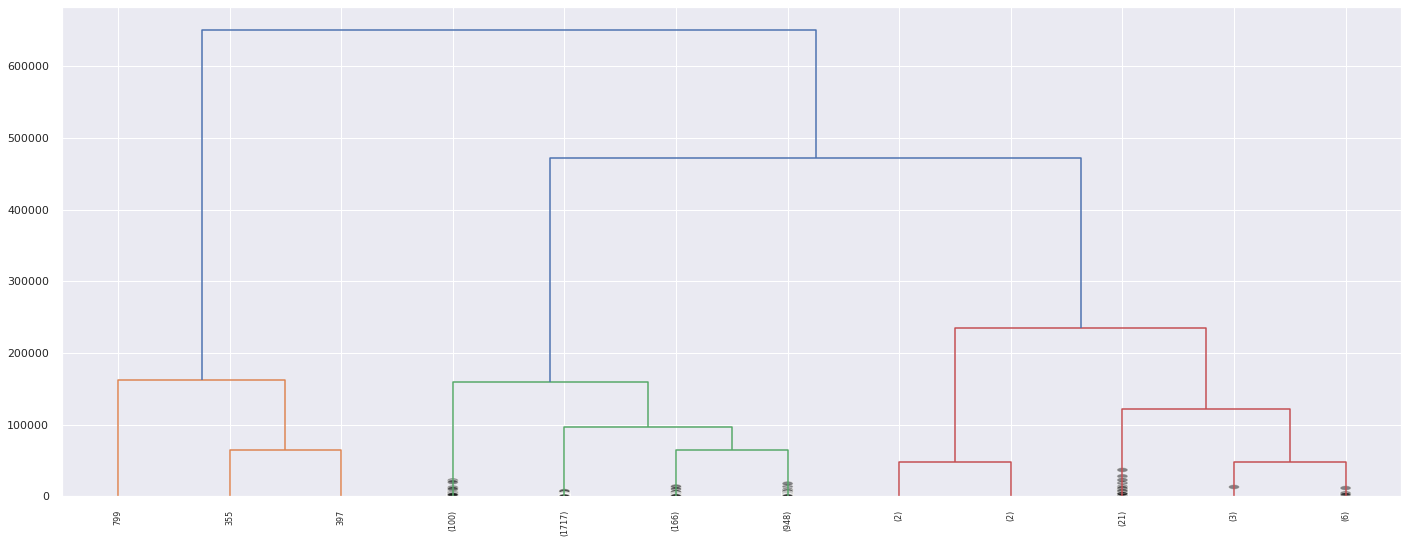

In [194]:
hc.dendrogram(
    hc_model,
    truncate_mode ='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
    
)

plt.show()

#### 7.3.1 HClustering Silhouette Score

In [203]:
hc_list = []
for k in clusters:
    #model definition & training
    hc_model = hc.linkage(X, 'ward')
    
    #model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust')
    
    #metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append( sil )


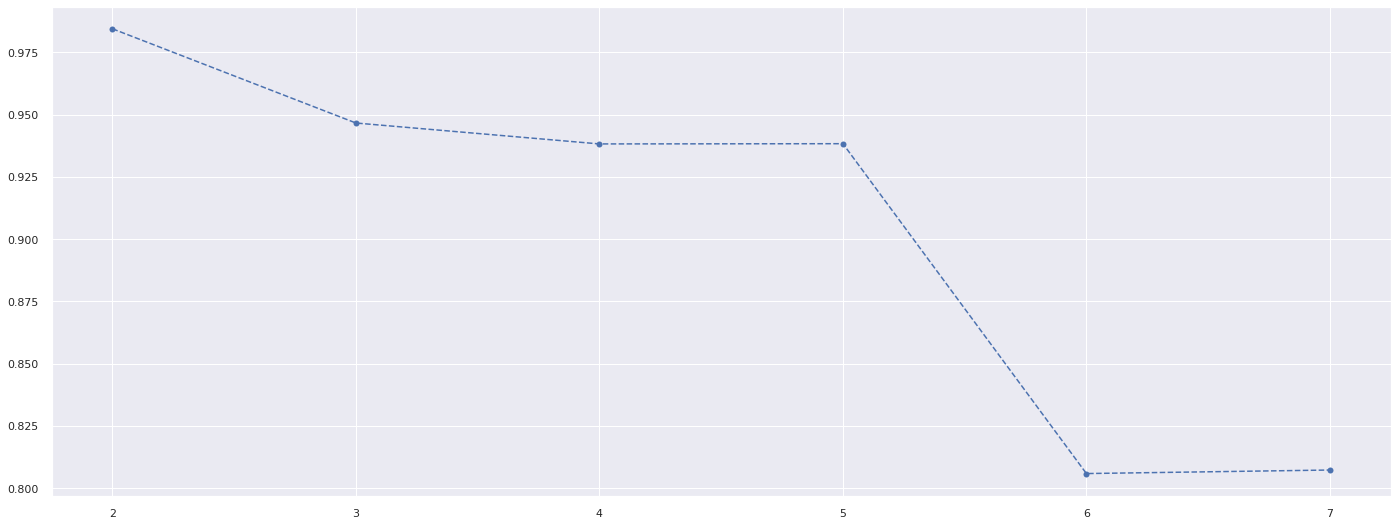

In [204]:
plt.plot( clusters, hc_list, linestyle='--', marker='o', color='b')

### 7.4 DBSCAN

### 7.5 Results

In [207]:
 # Model Name | k=2 | k=3 | k=4 | k=5 | ...
#  Kmeans      SS    SS    SS    SS
#  GMM         SS    SS    SS    SS
#  HC         SS     SS    SS    SS
#  DBSCAN     SS    SS    SS    SS

df_results = pd.DataFrame(
    {'KMeans': kmeans_list,
    'GMM' : gmm_list,
    'HC' : hc_list}
).T

df_results.columns = clusters

In [208]:
df_results.style.highlight_max( color='lightgreen', axis=1)

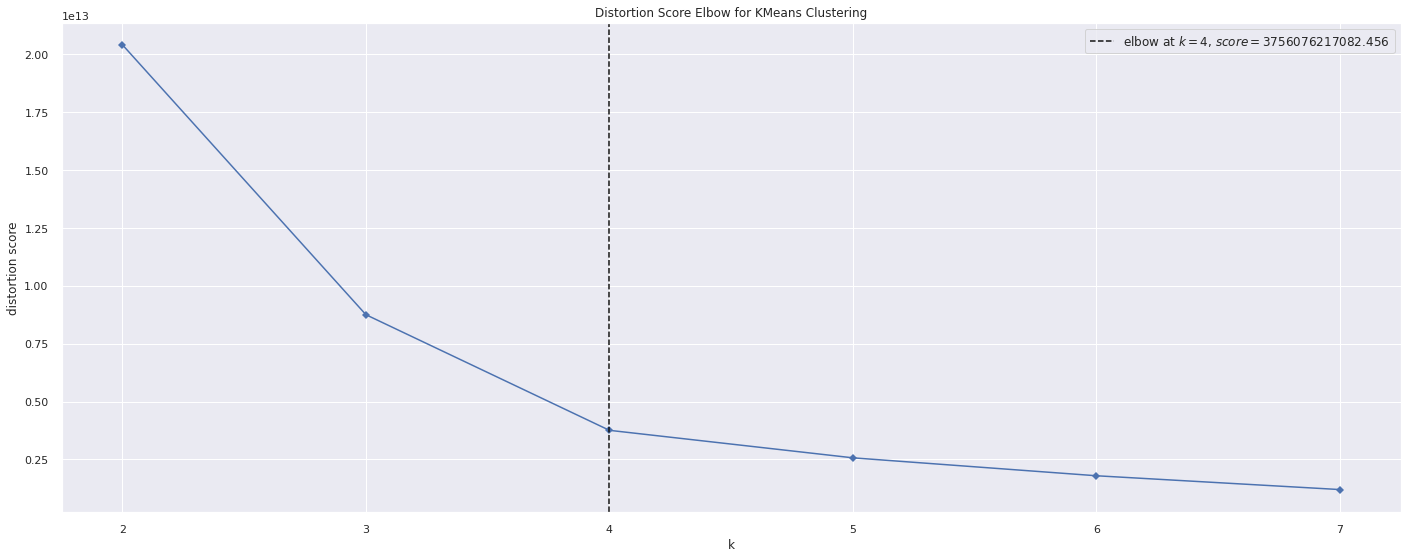

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k=clusters,  timings=False)
kmeans.fit(X)
kmeans.show()

### 7.2 Silhouette Score

In [167]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

KeyboardInterrupt: 

In [ ]:
# Silhouette Analysis
fig, ax = plt.subplots(3, 2, figsize=(25,18)) 

for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

## 8.0 Model Traning

### 8.1 K-Means

In [ ]:
# model definition
k = 3
kmeans = c.KMeans(init = 'random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

### 8.2 Cluster Validation

In [ ]:
# WSS ( Within-cluster sum of square )
print('WSS value: {}'.format(kmeans.inertia_))

# SS ( Silhouette Score )
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

## 9.0 Cluster Analysis

In [ ]:
df9 = df6.copy()
df9['cluster']= labels
df9.head()

### 9.1 Visualization Inspection

### 9.1.1 Silhouette

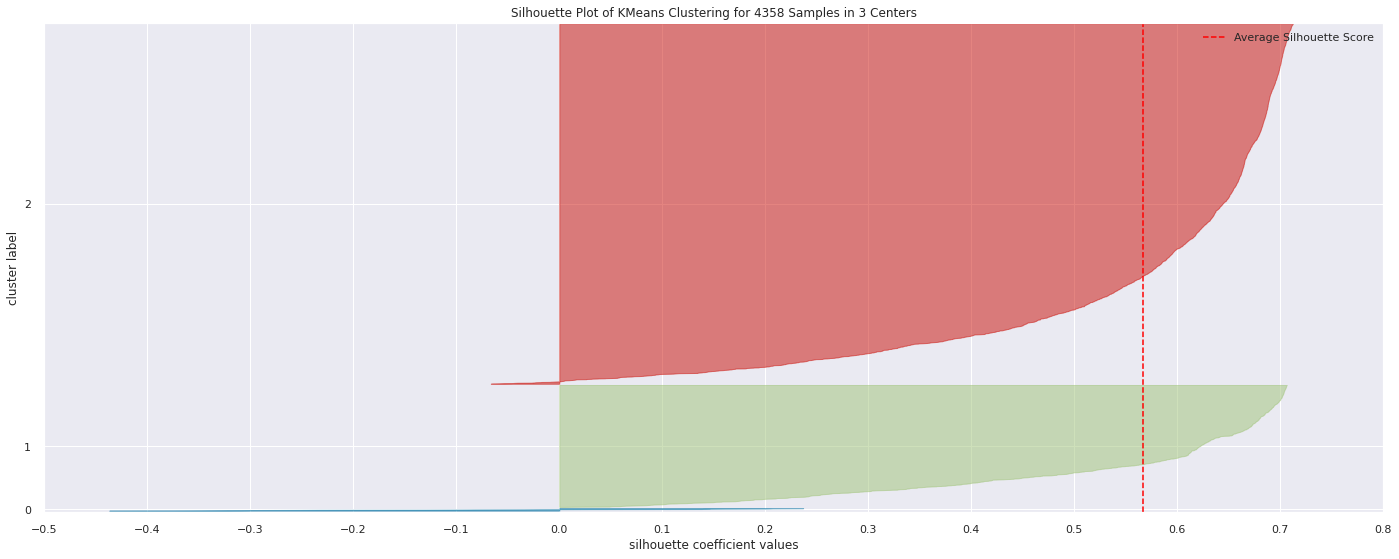

In [117]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

### 9.1.2 2d Plot

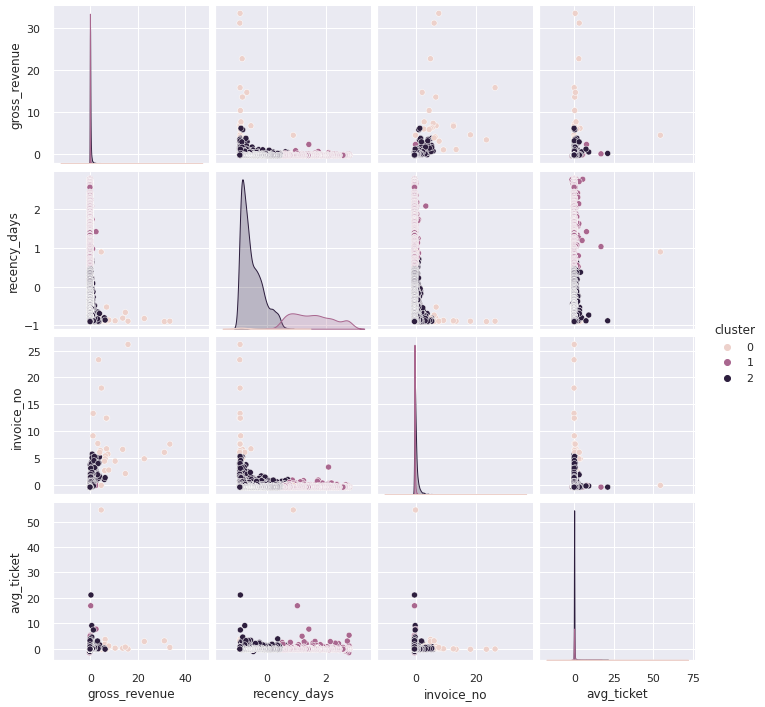

In [118]:
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

### 9.1.3 UMAP

In [70]:
!pip install umap-learn

In [ ]:
reducer = umap.UMAP(n_neighbors=10, random_state=42)
embbeding = reducer.fit_transform(X)

#embbeding
df_viz['embedding_x'] = embbeding[:,0]
df_viz['embedding_y'] = embbeding[:,1]

#plot UMAP
sns.scatterplot(x = 'embedding_x', y='embedding_y',
               hue = 'cluster',
               palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())),
               data=df_viz)


In [33]:
#fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

### 9.2 Cluster Profile

In [72]:
df9.head()

customer_id  gross_revenue_x  gross_revenue_y  recency_days  avg_ticket  cluster
0        17850          5391.21          5391.21         372.0   18.152222        2
1        13047          3232.59          3232.59          56.0   18.904035        1
2        12583          6705.38          6705.38           2.0   28.902500        2
3        13748           948.25           948.25          95.0   33.866071        1
4        15100           876.00           876.00         333.0  292.000000        1

In [74]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster' )

# Returns
df_qtde_returns = df92[['qtde_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_returns, how='inner', on='cluster' )

df_cluster


KeyError: "['gross_revenue'] not in index"

###  Cluster 01:  ( Candidato à Insider )

### Cluster 02:

### Cluster 03:

## 10.0 Deploy To Production